In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [39]:
%matplotlib inline

In [40]:
from sympy import *
init_session()

IPython console for SymPy 1.6.1 (Python 3.8.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [50]:
F = dsolve(Derivative(f(x), x)  -  2*f(x) - x + 1,f(x), ics={f(0):1})

In [86]:
H = lambdify(x, F.rhs)

In [87]:
H(0)

In [88]:
help(lambdify)

Help on function lambdify in module sympy.utilities.lambdify:

lambdify(args, expr, modules=None, printer=None, use_imps=True, dummify=False)
    Convert a SymPy expression into a function that allows for fast
    numeric evaluation.
    
    .. warning::
       This function uses ``exec``, and thus shouldn't be used on
       unsanitized input.
    
    Explanation
    
    For example, to convert the SymPy expression ``sin(x) + cos(x)`` to an
    equivalent NumPy function that numerically evaluates it:
    
    >>> from sympy import sin, cos, symbols, lambdify
    >>> import numpy as np
    >>> x = symbols('x')
    >>> expr = sin(x) + cos(x)
    >>> expr
    sin(x) + cos(x)
    >>> f = lambdify(x, expr, 'numpy')
    >>> a = np.array([1, 2])
    >>> f(a)
    [1.38177329 0.49315059]
    
    The primary purpose of this function is to provide a bridge from SymPy
    expressions to numerical libraries such as NumPy, SciPy, NumExpr, mpmath,
    and tensorflow. In general, SymPy functions 

## Résolution de $y'=2y + x - 1$

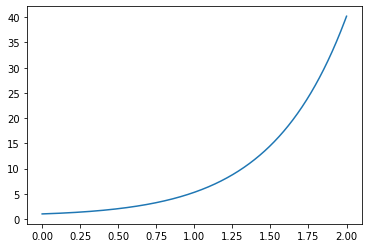

In [26]:
#y' = F(y, t)   : problème de Cauchy
def F(y, t):
    return 2 * y + t - 1

def f(x):
    return 3/4 * np.exp(2 *x) + (1 - 2*x)/4

t = np.linspace(0, 2, 1000)
y = odeint(F, 1, t)
#plt.plot(t, y[:,0])
plt.plot(t, f(t))

## Outils

In [31]:
def graphique_solution(les_y, les_temps, equation = ''):
    fig, ax = plt.subplots()
    fig.set_size_inches((10, 10)) 
    for y in les_y:
        ax.plot(les_temps, y)
    #positionnement des axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    #titre
    ax.set_title(r'Solution de %s'%equation)
    #enregistrement sur disque
    fig.savefig(r'solution-%s'%equation)

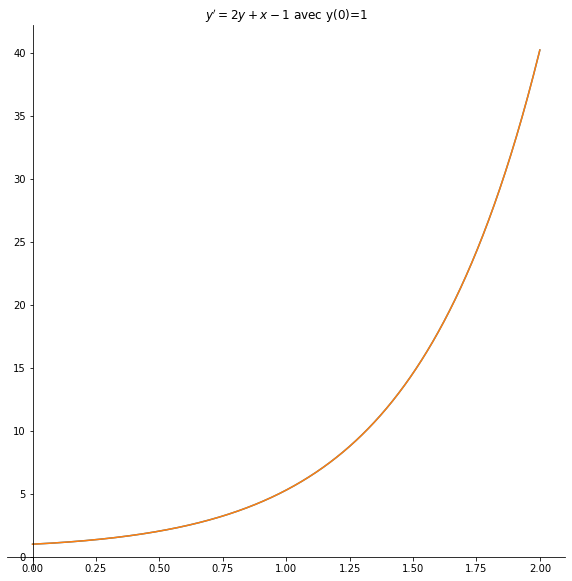

In [33]:
#y' = F(y, t)   : problème de Cauchy
def F(y, t):
    return 2 * y + t - 1

def f(x):
    return 3/4 * np.exp(2 *x) + (1 - 2*x)/4

t = np.linspace(0, 2, 1000)
y = odeint(F, 1, t)
y2 = f(t)

graphique_solution([y,y2], t, "$y'=2y+x-1$ avec y(0)=1")

In [108]:
def courbe_integrale_premier_degre(equation, tab_val_initial, les_temps, titre = ''):
    """
    equation : egalité sympy comme Eq(Derivative(f(x), x)  -  2*f(x) - x + 1,0)
    tab_val_initial : itérable renvoyant des valeurs initiales
    les_temps : tableau de temps généré avec np.linspace
    titre : équation au format Latex
    """
    fig, ax = plt.subplots()
    fig.set_size_inches((10, 10))
    for k in tab_val_initial:
        solution = dsolve(equation, f(x), ics = { f(0) : k})
        flambda = lambdify(x, solution.rhs, 'numpy')
        ax.plot(les_temps, flambda(les_temps), label = 'y(0) = %s'%k)
    #positionnement des axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    #titre
    ax.set_title(r'Résolution de %s'%titre)
    #legende
    ax.legend(loc = 'best')
    #enregistrement sur disque
    fig.savefig(r'resolution-%s'%titre.strip('$'))

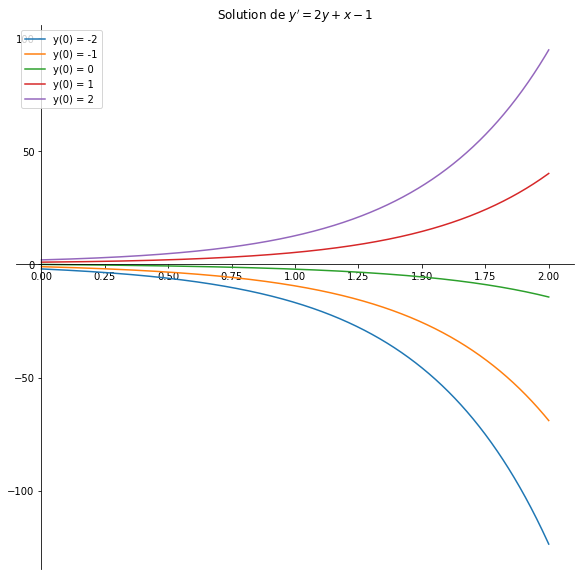

In [103]:
courbe_integrale(Eq(Derivative(f(x), x)  -  2*f(x) - x + 1,0), range(-2,3), np.linspace(0,2,1000), "$y'=2y+x-1$")

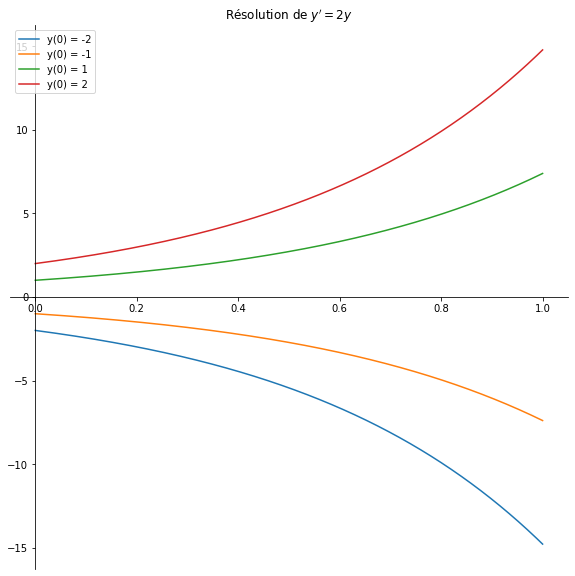

In [109]:
courbe_integrale(Eq(Derivative(f(x), x)  -  2*f(x),0), [-2,-1,1,2], np.linspace(0,1,1000), "$y'=2y$")